# Impacts of Social media on Mental health

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#importing sample data from csv
data=pd.read_csv('smmh.csv')
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


**Copy of the data**

In [3]:
df=data

**Removing less important fields**

In [4]:
df.drop(['Timestamp'],axis=1,inplace=True)

**Making the columns more meaningful**

**Before renaming**

In [5]:
df.columns

Index(['1. What is your age?', '2. Gender', '3. Relationship Status',
       '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, how do you fe

In [6]:
new_cols=['Age','Gender','Relationship_status','Occupation_status','Affiliation','Social_media_usage','Platforms','Avg_time_spent','SM_w/_specific_purpose','Distracted_busy',
          'Restlessness','Distraction_measure','Worried','Difficult_to_concentrate','Comparison_frequency','Comparison_feeling',
         'Seek_validation','Depressed','Interest_in_daily_activities','Sleeping_issues']
len(new_cols)

20

In [7]:
df.columns=new_cols

**After renaming**

In [8]:
df.columns

Index(['Age', 'Gender', 'Relationship_status', 'Occupation_status',
       'Affiliation', 'Social_media_usage', 'Platforms', 'Avg_time_spent',
       'SM_w/_specific_purpose', 'Distracted_busy', 'Restlessness',
       'Distraction_measure', 'Worried', 'Difficult_to_concentrate',
       'Comparison_frequency', 'Comparison_feeling', 'Seek_validation',
       'Depressed', 'Interest_in_daily_activities', 'Sleeping_issues'],
      dtype='object')

**Exploring the dataset**

In [9]:
df.shape

(481, 20)

In [10]:
df.describe()

,Age,SM_w/_specific_purpose,Distracted_busy,Restlessness,Distraction_measure,Worried,Difficult_to_concentrate,Comparison_frequency,Comparison_feeling,Seek_validation,Depressed,Interest_in_daily_activities,Sleeping_issues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Data Quality Check**

**Datatypes**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           481 non-null    float64
 1   Gender                        481 non-null    object 
 2   Relationship_status           481 non-null    object 
 3   Occupation_status             481 non-null    object 
 4   Affiliation                   451 non-null    object 
 5   Social_media_usage            481 non-null    object 
 6   Platforms                     481 non-null    object 
 7   Avg_time_spent                481 non-null    object 
 8   SM_w/_specific_purpose        481 non-null    int64  
 9   Distracted_busy               481 non-null    int64  
 10  Restlessness                  481 non-null    int64  
 11  Distraction_measure           481 non-null    int64  
 12  Worried                       481 non-null    int64  
 13  Diffi

**Duplicate records**

In [12]:
df.duplicated().sum()

0

**Missing values**

In [13]:
df.isna().sum()

Age                              0
Gender                           0
Relationship_status              0
Occupation_status                0
Affiliation                     30
Social_media_usage               0
Platforms                        0
Avg_time_spent                   0
SM_w/_specific_purpose           0
Distracted_busy                  0
Restlessness                     0
Distraction_measure              0
Worried                          0
Difficult_to_concentrate         0
Comparison_frequency             0
Comparison_feeling               0
Seek_validation                  0
Depressed                        0
Interest_in_daily_activities     0
Sleeping_issues                  0
dtype: int64

Affliation of respondents with organizations has missing values.As this column is not required for analyis we can drop them

In [14]:
df.drop(['Affiliation'],axis=1,inplace=True)

In [15]:
df['Avg_time_spent'].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary ', 'Non-binary', 'NB', 'unsure ',
       'Trans', 'Non binary ', 'There are others???'], dtype=object)

In [17]:
df['Gender']=df['Gender'].map({'Male':"Male", 'Female':"Female",'Nonbinary ': 'Others', 'Non-binary':'Others', 'NB':'Others', 'unsure ':'Others',
       'Trans':'Others', 'Non binary ':'Others', 'There are others???':'Others'})

In [18]:
df['Gender'].unique()

array(['Male', 'Female', 'Others'], dtype=object)

### Adhoc analysis

1. Which Category of people among students and working professionals use social media more?
2. Which Gender uses the social media more?
3. Which age group uses social media the most?
4. Which social media platform is used by most number of individuals?
5. What is the average time spent by individuals in social media?
6. How many individuals just scroll through social media without any specific purpose?
7. Do people feel restless if they haven't used social media for a while?
8. How people are distracted on a scale of 1-5 by using social media?
9. Does it seem difficult to concentrate for people who use social media?
10. Do people who use social media compare theirselves with successful people?
11. Does comparision create depression in individuals?
12. Are people seeking validation through social media?
13. How does social media affect the interest in day to day activites?
14. Which Gender is more depressed?
15. Is Social media usage correlated with sleeping issues?

In [19]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6),
    'axes.spines.top': True,
    'axes.spines.right': True,
})

# Set up Seaborn default styles


**1. Which Category of people among students and working professionals use social media more?**

In [20]:
df[df['Social_media_usage']=='Yes']['Occupation_status'].value_counts()

Occupation_status
University Student    291
Salaried Worker       130
School Student         49
Retired                 8
Name: count, dtype: int64

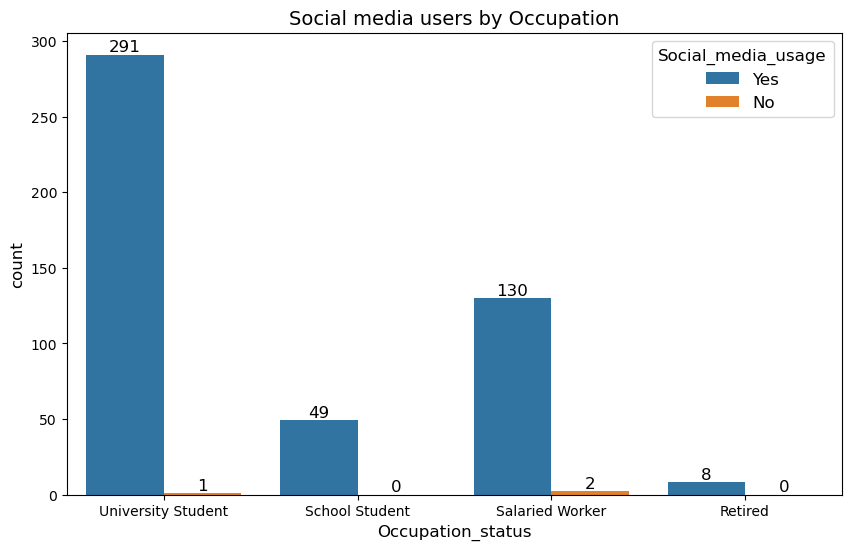

In [21]:
ax=sns.countplot(x='Occupation_status',data=df,hue='Social_media_usage')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Social media users by Occupation')
plt.show()

As expected most number of social media users are University and school students, working professionals are next to students in social media usage.

**2. Which Gender uses the social media more?**


In [22]:
gender_usage=df[df['Social_media_usage']=='Yes']['Gender'].value_counts()
gender_usage

Gender
Female    263
Male      208
Others      7
Name: count, dtype: int64

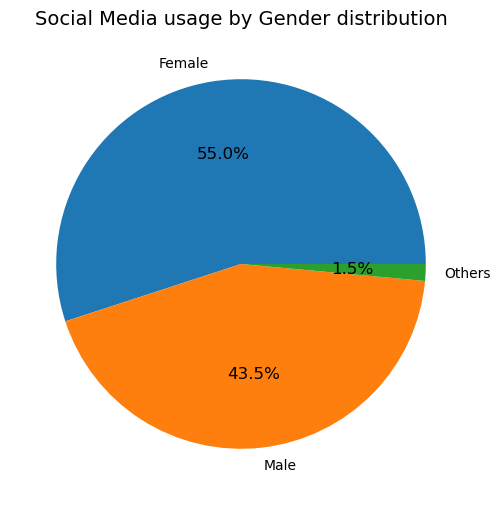

In [23]:
plt.pie(gender_usage,labels=gender_usage.index,autopct='%1.1f%%')
plt.title('Social Media usage by Gender distribution')
plt.show()

Based on the above chart we can able to see the percentage of females using social media is high when compared to male group.
But there will be no huge difference or variation while considering the entire population as both gender groups use social media equally.

**3. Which group of people use social media more either singles or married?**

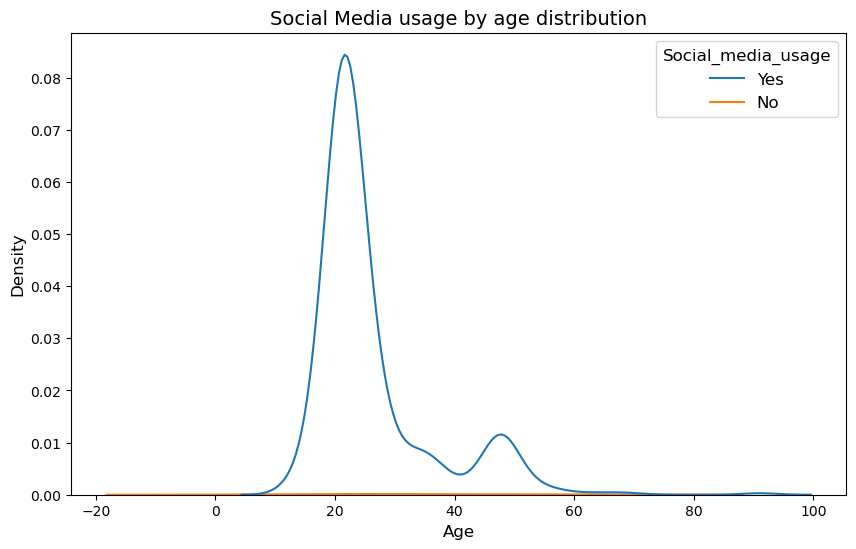

In [24]:
sns.kdeplot(x='Age',data=df,hue='Social_media_usage')
plt.title('Social Media usage by age distribution')
plt.show()

It is not a big suprise that younger generation like Genz and Gen alpha population (17-28 age group)use social media the most, whereas the usage reduces as the age increases.

**4.Which social media platform is used by most number of individuals?**

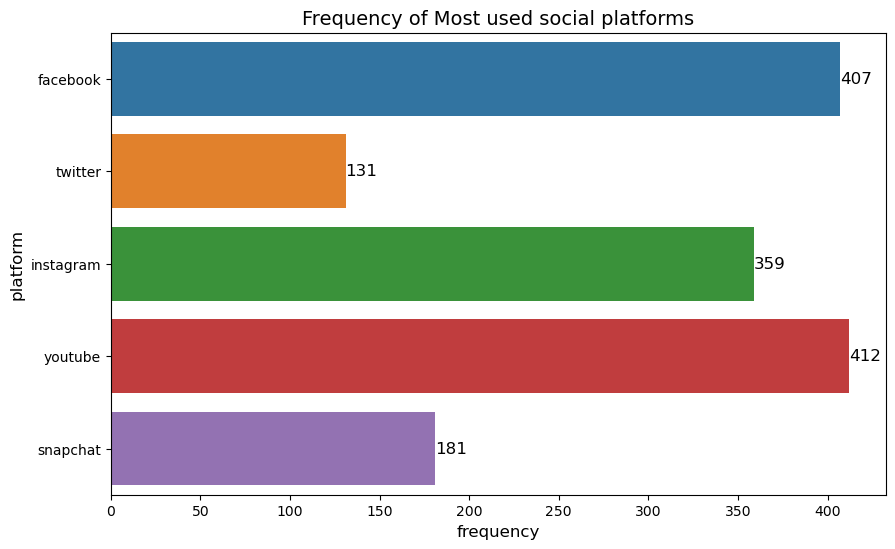

In [25]:
popular_platforms=['facebook','twitter','instagram','youtube','snapchat']
freq={}
def platform_frequency(media):

    media = media.str.lower() 
    for platform in popular_platforms:
        freq[platform]=media.str.contains(platform).sum()
platform_frequency(df['Platforms'])
media_freq=pd.DataFrame(list(freq.items()),columns=['platform','frequency'])
ax=sns.barplot(y='platform',x='frequency',data=media_freq)
ax.bar_label(container=ax.containers[0])
plt.title('Frequency of Most used social platforms')
plt.show()

As expected Youtube,Facebook and Instagram holds the top 3 places among the platforms used by people.Suprisingly in this sample data snapchat users are more than twitter users.

**5.What is the average time spent by individuals in social media?**

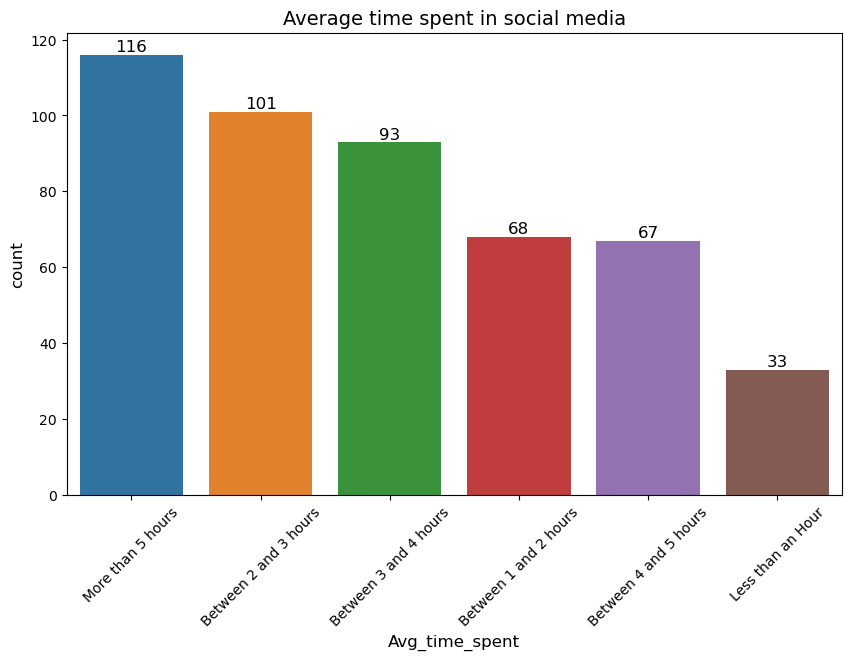

In [26]:
time_spent=df[df['Social_media_usage']=='Yes']['Avg_time_spent'].value_counts()
time_spent
ax=sns.barplot(y=time_spent,x=time_spent.index)
ax.bar_label(container=ax.containers[0])
plt.title('Average time spent in social media')
plt.xticks(rotation=45)
plt.show()

Largest proportion of users in the sample use social media somewhere between a minimum of 2 hours and maximum of more than 5 hours in average.

**6.How many individuals just scroll through social media without any specific purpose?**

**Converting the numeric data type into object for ease of analysis**

In [27]:
num_cols=df.select_dtypes(include=np.number)
num_cols.drop(['Age'],axis=1,inplace=True)

In [28]:
num_cols=num_cols.applymap(lambda x:  'Low' if x<=2  else('Medium' if x==3 else 'High'))

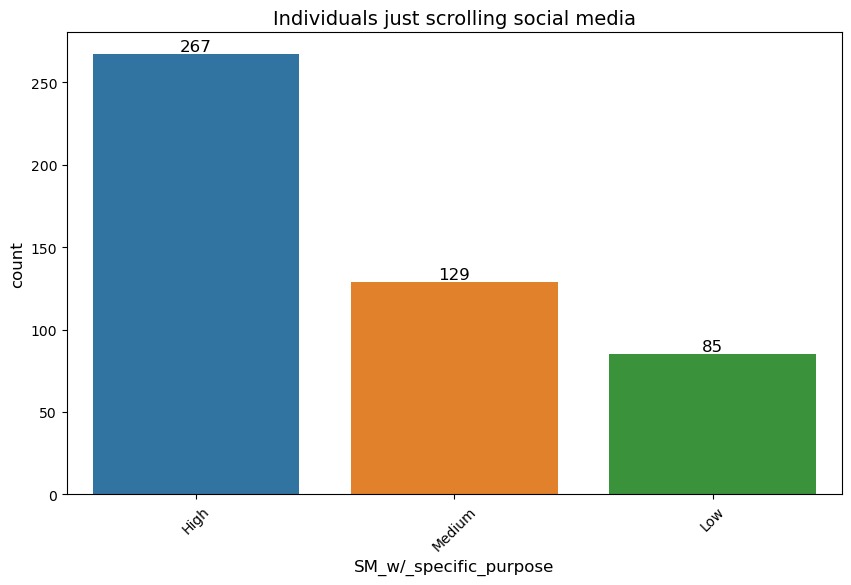

In [29]:
specific_purpose=num_cols['SM_w/_specific_purpose'].value_counts()
specific_purpose
ax=sns.barplot(y=specific_purpose,x=specific_purpose.index)
ax.bar_label(container=ax.containers[0])
plt.title('Individuals just scrolling social media')
plt.xticks(rotation=45)
plt.show()

Again a well known fact from the sample is that most number of users just scroll through social media without any specific purpose.

**7.Do people feel restless if they haven't used social media for a while?**

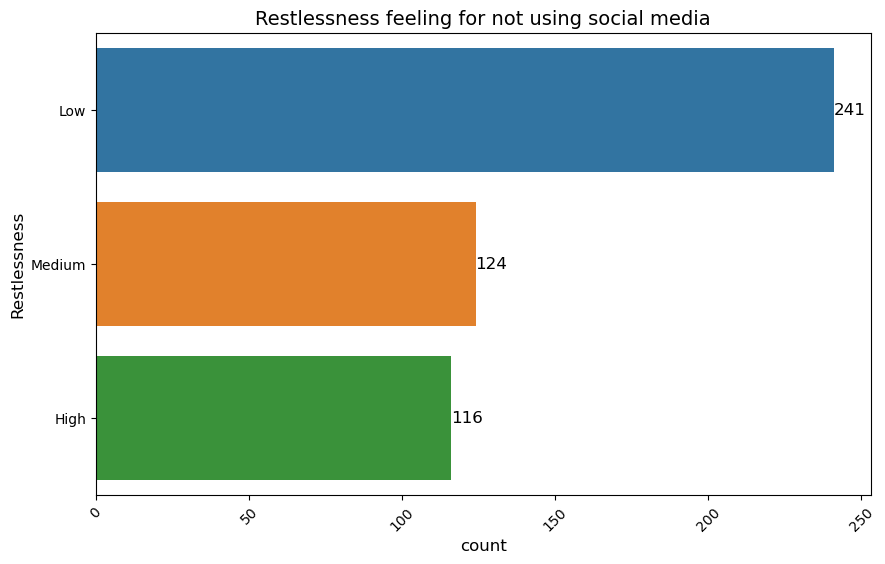

In [30]:
restlessness=num_cols['Restlessness'].value_counts()
restlessness
ax=sns.barplot(x=restlessness,y=restlessness.index)
ax.bar_label(container=ax.containers[0])
plt.title('Restlessness feeling for not using social media')
plt.xticks(rotation=45)
plt.show()

Interestingly from the above sample observations most no of users have lesser or moderate amount of restlessness if they haven't used social media. 

**8.How people are distracted on a scale of 1-5 by using social media?**

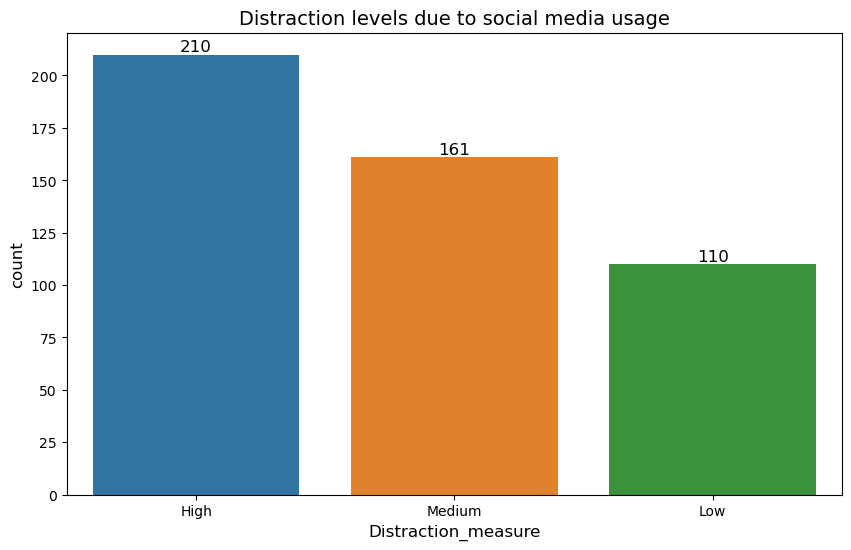

In [31]:
Distraction_level=num_cols['Distraction_measure'].value_counts()
Distraction_level
ax=sns.barplot(y=Distraction_level,x=Distraction_level.index)
ax.bar_label(container=ax.containers[0])
plt.title('Distraction levels due to social media usage')
plt.show()

Another well known fact that we can infer through analysis of the sample data is very less number of people are not distracted whereas a more number of people have higher distraction levels.

**9.Does it seem difficult to concentrate for people who use social media?**

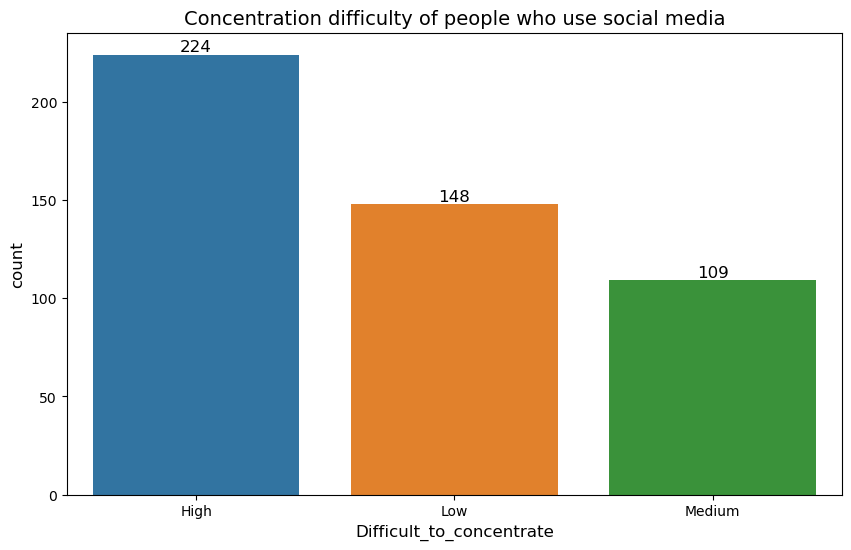

In [32]:
concentration_level=num_cols['Difficult_to_concentrate'].value_counts()
concentration_level
ax=sns.barplot(y=concentration_level,x=concentration_level.index)
ax.bar_label(container=ax.containers[0])
plt.title('Concentration difficulty of people who use social media')
plt.show()

Number of people who find it more difficult to concentrate is higher, while comparatively fewer people find it less difficult to concentrate on things.

**10.Do people who use social media compare theirselves with successful people?**

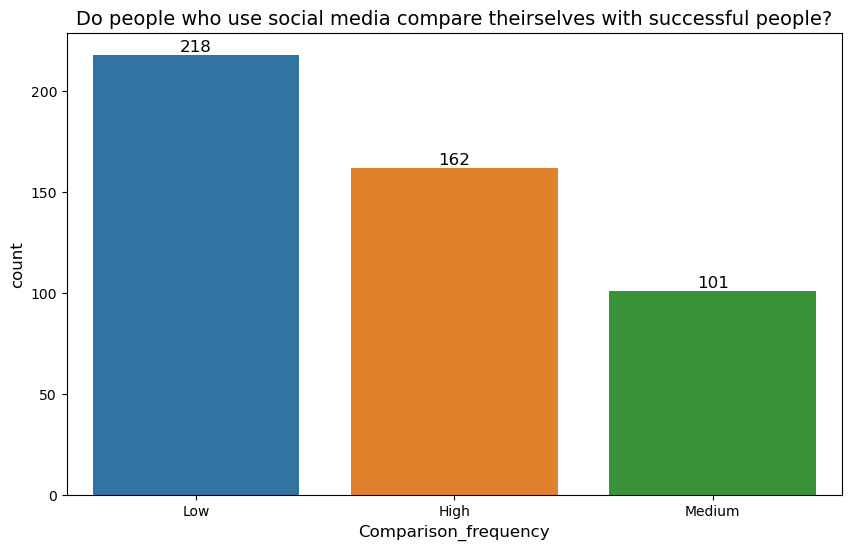

In [33]:
comparision_measure=num_cols['Comparison_frequency'].value_counts()
comparision_measure
ax=sns.barplot(y=comparision_measure,x=comparision_measure.index)
ax.bar_label(container=ax.containers[0])
plt.title('Do people who use social media compare theirselves with successful people?')
plt.show()

From the sample data,suprisingly quite a lesser number of users compare themselves with successful people and yet a chunk of users compare themselves with successful people

**11.Does comparision create depression in individuals?**

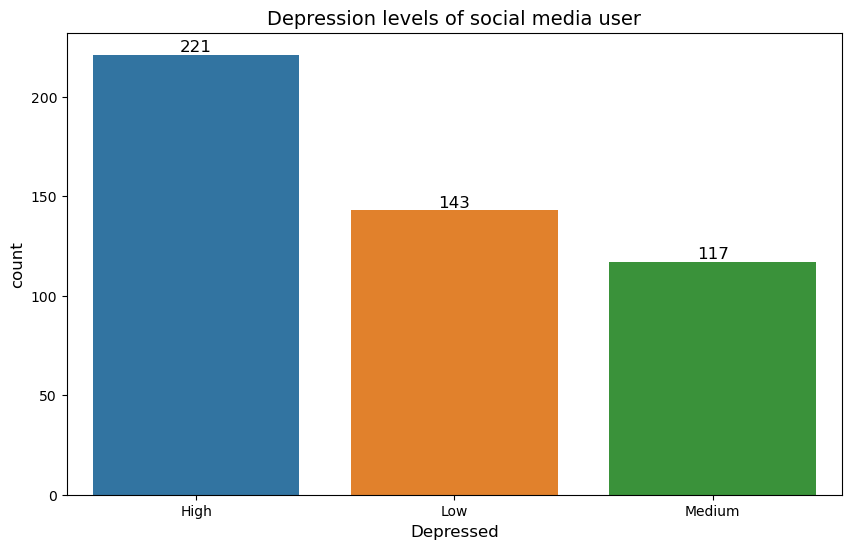

In [34]:
Depression=num_cols['Depressed'].value_counts()
Depression
ax=sns.barplot(y=Depression,x=Depression.index)
ax.bar_label(container=ax.containers[0])
plt.title('Depression levels of social media user')
plt.show()

Social media users have higher levels of depression and considerable amount of people have lower or moderate levels of depression.

**12. Are people seeking validation through social media?**

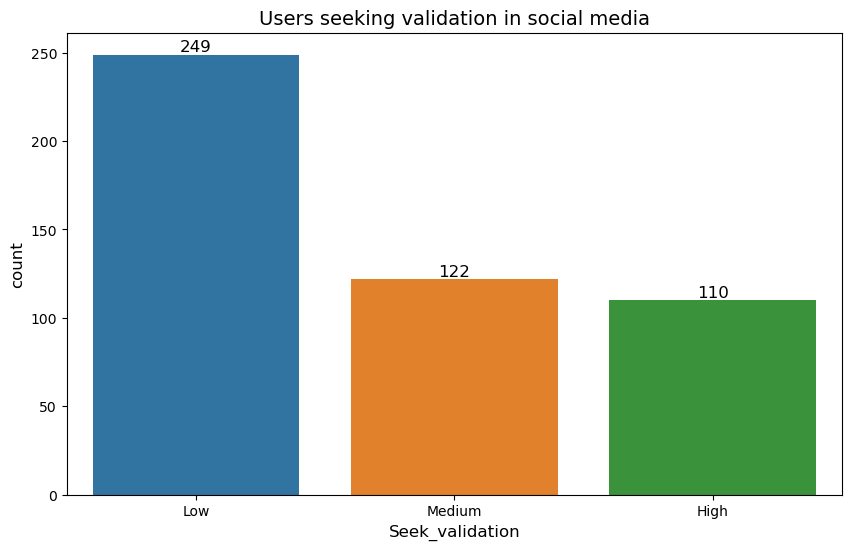

In [35]:
validation=num_cols['Seek_validation'].value_counts()
validation
ax=sns.barplot(y=validation,x=validation.index)
ax.bar_label(container=ax.containers[0])
plt.title('Users seeking validation in social media')
plt.show()

Interestingly large amount of people do not seek validation in social media based on the chart above

**13.How does social media affect the interest in day to day activites?**

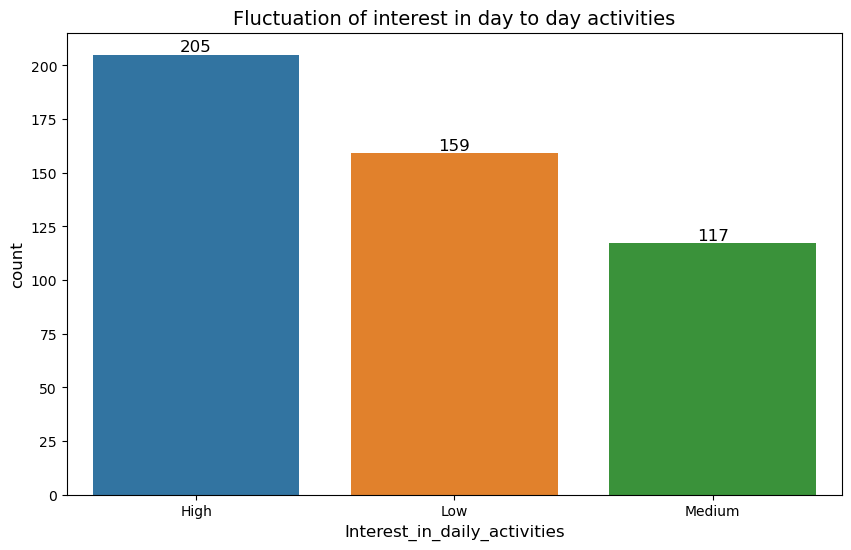

In [36]:
interest=num_cols['Interest_in_daily_activities'].value_counts()
interest
ax=sns.barplot(y=interest,x=interest.index)
ax.bar_label(container=ax.containers[0])
plt.title('Fluctuation of interest in day to day activities')
plt.show()

Social media usage creates high fluctuation of interest in day to day activities among most people.

**14.Which Gender is more depressed?**

In [37]:
num_cols['Gender']=df['Gender']

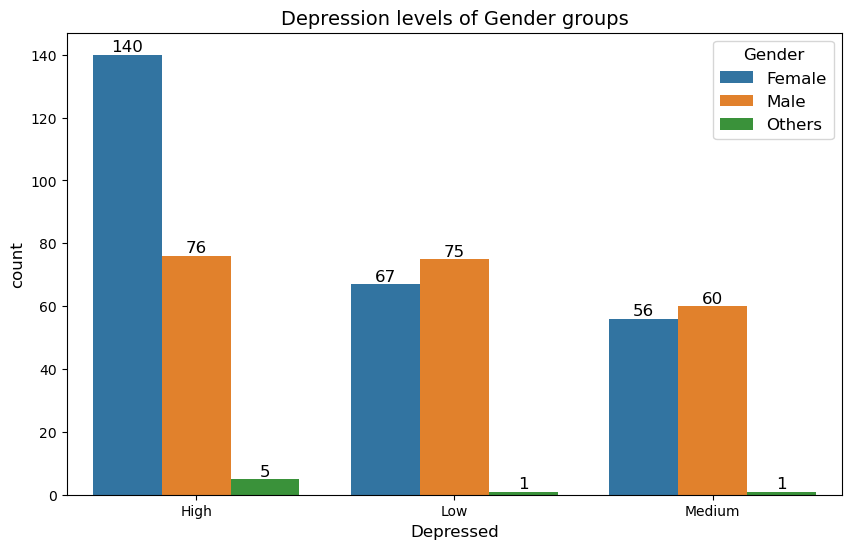

In [38]:
Depression=num_cols[['Depressed','Gender']].value_counts().reset_index()
Depression[(Depression['Gender']=='Male') | (Depression['Gender']=='Female')]
ax=sns.barplot(y='count',x='Depressed',hue='Gender',data=Depression)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Depression levels of Gender groups')
plt.show()

Interestingly Females using social media are having high depression whereas only half of males have higher depression levels.
Also the number of males having low depression level is higher than females in the sample.

**15.Is Social media usage correlated with sleeping issues?**

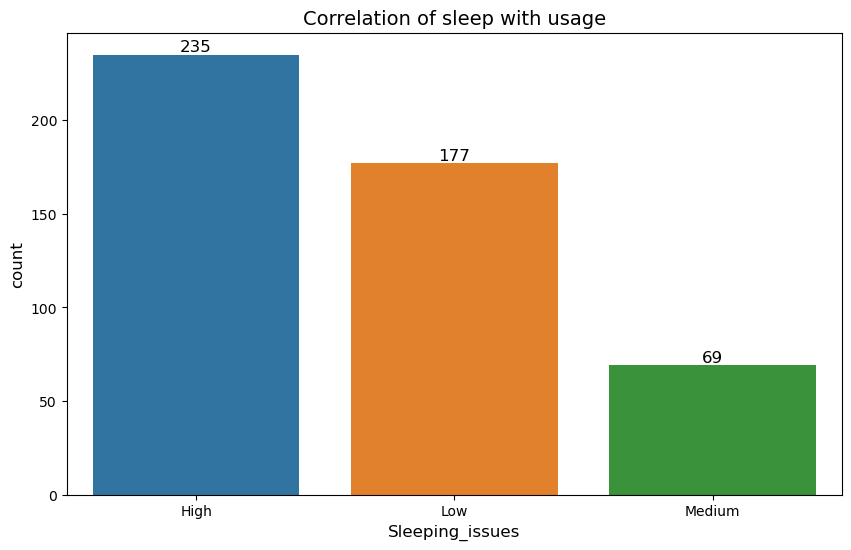

In [39]:
sleeping_issues=num_cols['Sleeping_issues'].value_counts()
ax=sns.barplot(y=sleeping_issues,x=sleeping_issues.index)
ax.bar_label(container=ax.containers[0])
plt.title('Correlation of sleep with usage')
plt.show()

As expected higher number of people who use social media have sleeping issues.